In [3]:
!pip install chromadb boto3 pillow matplotlib --quiet

In [4]:
import boto3
import chromadb
from chromadb.utils.embedding_functions import AmazonBedrockEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader

boto_session = boto3.Session(profile_name="sandbox", region_name="us-west-2")
model_id = "amazon.titan-embed-image-v1"

embedding_function = AmazonBedrockEmbeddingFunction(session=boto_session, model_name=model_id)
data_loader = ImageLoader()

client = chromadb.Client()

collection = client.get_or_create_collection(
    name="sample-image-library",
    embedding_function=embedding_function,
    data_loader=data_loader
)

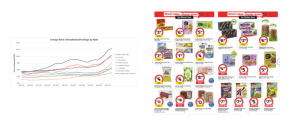

In [5]:
import os
import mimetypes
import matplotlib.pyplot as plt
from PIL import Image


plot_cols = 2
plot_rows = 1
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_rows*3, plot_cols*3))
axes = axes.flatten()

dir_path = "../samples/"

images_uris = sorted([os.path.join(dir_path, image) for image in os.listdir(dir_path) if mimetypes.guess_type(os.path.join(dir_path, image))[0] == "image/png"])

for i, image_uri in enumerate(images_uris):
    image = ((Image.open(image_uri)))
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [6]:
ids = [f"{i+1}" for i in range(len(images_uris))]
print(ids)
print(images_uris)

collection.add(ids=ids, uris=images_uris)


['1', '2']
['../samples/Average-Price-of-Residential-Dwellings-By-State-NEW-2048x803.png', '../samples/Coles.png']


TypeError: Object of type ndarray is not JSON serializable